In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_df=pd.read_csv('/content/sample_data/loan.csv')
pd.set_option('display.min_rows', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 111)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust display width

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Inspecting
loan_df.shape

(39717, 111)

In [6]:
# Inspect data types and check for missing values
data_info = loan_df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
#Cleaning
cols_to_drop = loan_df.columns[loan_df.isnull().all()]
loan_df = loan_df.drop(cols_to_drop, axis=1)

In [9]:
cols_to_drop = [col for col in loan_df.columns if len(loan_df[col].unique()) == 1]
cols_to_drop


['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [10]:
#drop columns with same values
loan_df = loan_df.drop(columns=cols_to_drop)

In [11]:
cols_to_drop = loan_df.columns[loan_df.isnull().sum()/len(loan_df)*100 > 30.00]
cols_to_drop

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [12]:
loan_df = loan_df.drop(cols_to_drop, axis=1)

In [13]:
zero_columns = loan_df.columns[(loan_df == 0).all()]
zero_columns

Index([], dtype='object')

In [14]:
loan_df = loan_df.drop(zero_columns, axis=1)

In [ ]:
for col in loan_df.columns:
  print(f"Value Counts for Column '{col}':")
  print(loan_df[col].value_counts())
  print("-" * 20)

In [ ]:
for col in loan_df.columns:
  print(f"Unique Counts for Column '{col}':")
  print(loan_df[col].unique())
  print("-" * 20)

In [15]:
not_required_columns=['id',
                      'member_id',
                      'emp_title',
                      'title',
                      'url',
                      'tax_liens',
                      'chargeoff_within_12_mths',
                      'collections_12_mths_ex_med',
                      'last_pymnt_d',
                      'last_pymnt_amnt',
                      'last_credit_pull_d',
                      'total_pymnt',
                      'total_pymnt_inv',
                      'total_rec_prncp',
                      'total_rec_int',
                      'total_rec_late_fee',
                      'recoveries',
                      'collection_recovery_fee',
                      'delinq_2yrs',
                      'earliest_cr_line',
                      'inq_last_6mths',
                      'open_acc',
                      'pub_rec',
                      'revol_bal',
                      'revol_util',
                      'out_prncp',
                      'out_prncp_inv'
                      ]

In [16]:
loan_df = loan_df.drop(not_required_columns, axis=1)

In [17]:
#Remove rows with on going loan
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [18]:
# Find the number of duplicate rows (considering all columns)
num_duplicates_all = len(loan_df) - len(loan_df.drop_duplicates())
num_duplicates_all

0

In [19]:
# Find columns with any NaN values
columns_with_nan = loan_df.columns[loan_df.isna().any()]
print("Columns with NaN values:", columns_with_nan.tolist())

Columns with NaN values: ['emp_length', 'pub_rec_bankruptcies']


In [20]:
loan_df['emp_length'].isna().sum()

1033

In [21]:
loan_df[loan_df.emp_length.isna()]['annual_inc'].describe()

,annual_inc
count,1033.000000
mean,45913.330649
std,37964.731520
min,4200.000000
25%,25000.000000
50%,38368.000000
75%,57600.000000
max,648000.000000


In [ ]:
loan_df['emp_length'].mode()

In [23]:
# Remove 'years', '<', '>', and '+'
loan_df['emp_length'] = loan_df['emp_length'].str.replace(r'[years<>+]', '', regex=True).str.strip()
#loan_df[loan_df['emp_length']==10]['annual_inc'].describe()
#loan_df.value_counts()
loan_df['emp_length'] = loan_df['emp_length'].fillna(10)

In [24]:
loan_df['emp_length'].isna().sum()

0

In [25]:
loan_df['emp_length']=loan_df['emp_length'].astype(int)

In [ ]:
loan_df['pub_rec_bankruptcies'].isna().sum()

In [ ]:
loan_df[loan_df['pub_rec_bankruptcies'].isna()].describe()

In [28]:
loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]

In [ ]:
loan_df.isna().sum().sort_values(ascending=False)

In [ ]:
for col in loan_df.columns:
  print(f"Unique Counts for Column '{col}':")
  print(loan_df[col].unique())
  print("-" * 20)

In [31]:
loan_df['term'] = loan_df['term'].str.replace(' months', '').astype(int)
loan_df['home_ownership'] = loan_df['home_ownership'].replace('NONE','OTHER')
loan_df['verification_status'] = loan_df['verification_status'].replace('Source Verified','Verified')

In [30]:
#Data conversion
loan_df.shape

(37880, 20)

In [32]:
loan_df['grade'] = loan_df['grade'].astype('category')
loan_df['sub_grade'] = loan_df['sub_grade'].astype('category')
loan_df['verification_status'] = loan_df['verification_status'].astype('category')
loan_df['loan_status'] = loan_df['loan_status'].astype('category')


In [33]:
loan_df['int_rate'] = loan_df['int_rate'].astype(str)
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '')
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'], errors='coerce')


In [34]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

In [35]:
#Adding seperate month and year from issue date to check monthwise and yearwise data
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [36]:
outliers_info = {}

for col in loan_df.select_dtypes(include=[np.number]).columns:
    Q1 = loan_df[col].quantile(0.25)
    Q3 = loan_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = loan_df[(loan_df[col] < lower_bound) | (loan_df[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info

{'loan_amnt': {'Lower Bound': -9062.5,
  'Upper Bound': 29437.5,
  'Outliers Count': 1092},
 'funded_amnt': {'Lower Bound': -9500.0,
  'Upper Bound': 29700.0,
  'Outliers Count': 920},
 'funded_amnt_inv': {'Lower Bound': -8800.0,
  'Upper Bound': 28000.0,
  'Outliers Count': 915},
 'term': {'Lower Bound': 0.0, 'Upper Bound': 96.0, 'Outliers Count': 0},
 'int_rate': {'Lower Bound': 0.6599999999999984,
  'Upper Bound': 22.740000000000002,
  'Outliers Count': 49},
 'installment': {'Lower Bound': -223.77500000000003,
  'Upper Bound': 815.145,
  'Outliers Count': 1357},
 'emp_length': {'Lower Bound': -8.5, 'Upper Bound': 19.5, 'Outliers Count': 0},
 'annual_inc': {'Lower Bound': -23000.0,
  'Upper Bound': 145000.0,
  'Outliers Count': 1726},
 'dti': {'Lower Bound': -7.410000000000002,
  'Upper Bound': 34.19,
  'Outliers Count': 0},
 'total_acc': {'Lower Bound': -11.0,
  'Upper Bound': 53.0,
  'Outliers Count': 506},
 'pub_rec_bankruptcies': {'Lower Bound': 0.0,
  'Upper Bound': 0.0,
  'Outl

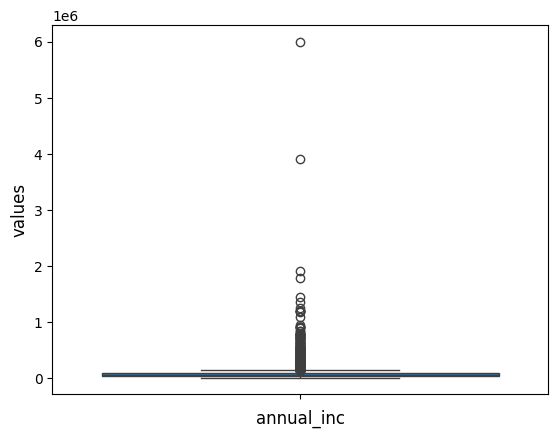

In [37]:
# Show boxplot
sns.boxplot(y=loan_df['annual_inc'])
plt.xlabel('annual_inc', fontsize=12)
plt.ylabel('values', fontsize=12)
plt.show()

In [ ]:
# Remove outliers for annual income
loan_df['annual_inc'].sort_values(ascending=False).head(7)


In [39]:
loan_df_filtered=loan_df[loan_df['annual_inc']<145000]
#loan_df_filtered['annual_inc'].value_counts().sort_index(ascending=False)


In [40]:
#loan_df= loan_df[(loan_df['annual_inc'] < 1450000.0)]
loan_df_filtered['annual_inc'].count()

36094

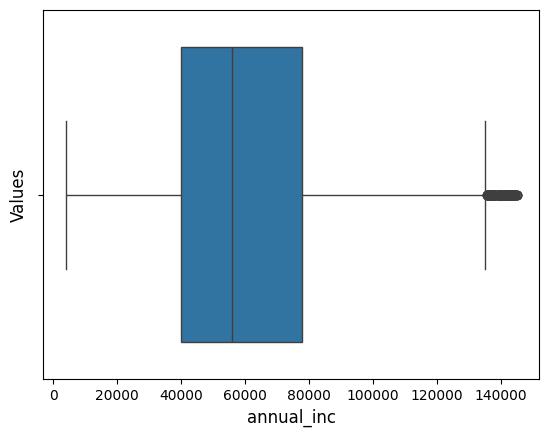

In [41]:
sns.boxplot(x=loan_df_filtered['annual_inc'])
plt.xlabel('annual_inc', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [42]:
len(loan_df[(loan_df.annual_inc > 145000.0) & (loan_df.loan_status == 'Charged Off')])


191

In [43]:
loan_df= loan_df[(loan_df['annual_inc'] < 1450000.0)]

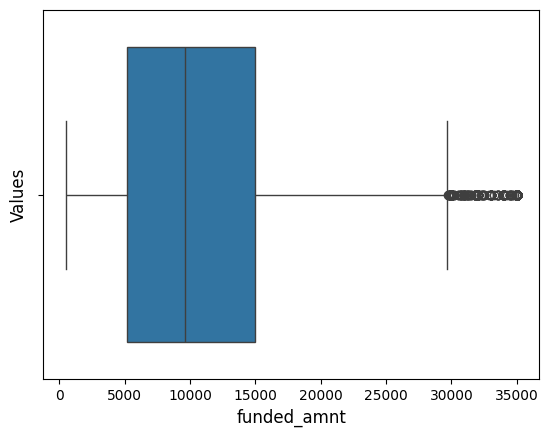

In [44]:
sns.boxplot(x=loan_df['funded_amnt'])
plt.xlabel('funded_amnt', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [45]:
df_funded_amnt_filtered=loan_df[(loan_df.funded_amnt > 30000) & (loan_df.loan_status=='Charged off')]
len(df_funded_amnt_filtered)

0

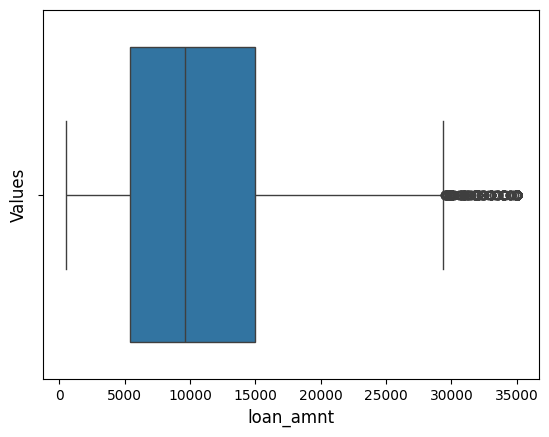

In [47]:
sns.boxplot(x=loan_df['loan_amnt'])
plt.xlabel('loan_amnt', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()


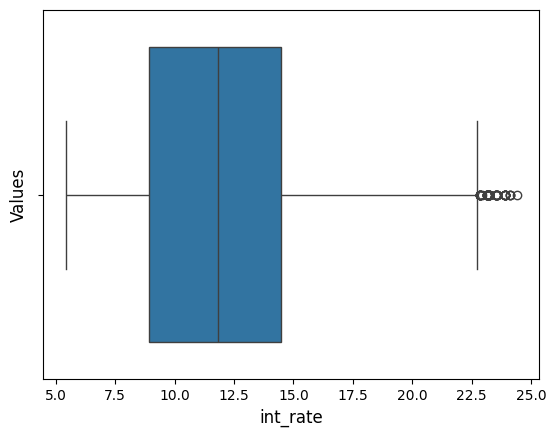

In [42]:
sns.boxplot(x=loan_df['int_rate'])
plt.xlabel('int_rate', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

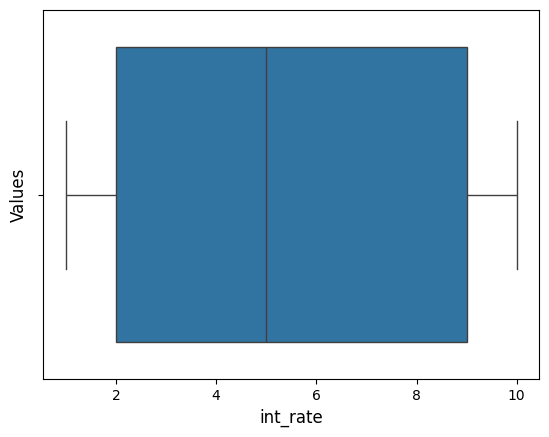

In [43]:
sns.boxplot(x=loan_df['emp_length'])
plt.xlabel('int_rate', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [56]:
#creating bins
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-145k'])
loan_df['funded_amnt_bin'] = pd.cut(loan_df['funded_amnt'], bins=4,precision =0,labels =['0-5k','5k-10k','10k-15k','15k-above'])
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], bins=6,precision =0,labels=['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])

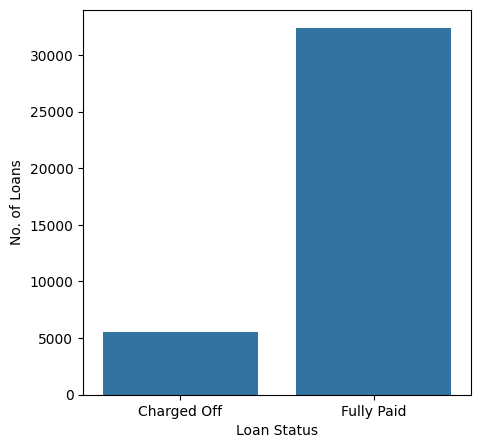

In [48]:
#Univariate Analysis
#count plot for loan status
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=loan_df)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

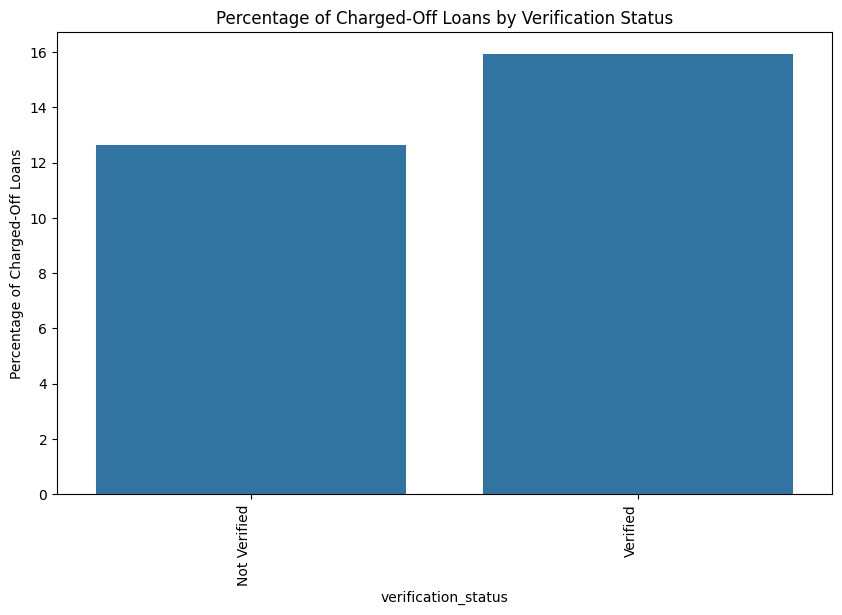

loan_status          Charged Off  Fully Paid  Total  Charged_Off_Percentage
verification_status                                                        
Not Verified                2024       13972  15996               12.653163
Verified                    3485       18395  21880               15.927788


In [80]:
# Charged Off loan Percentage Vs Verification_status
status_counts = loan_df.groupby('verification_status')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('verification_status')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Verification Status')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

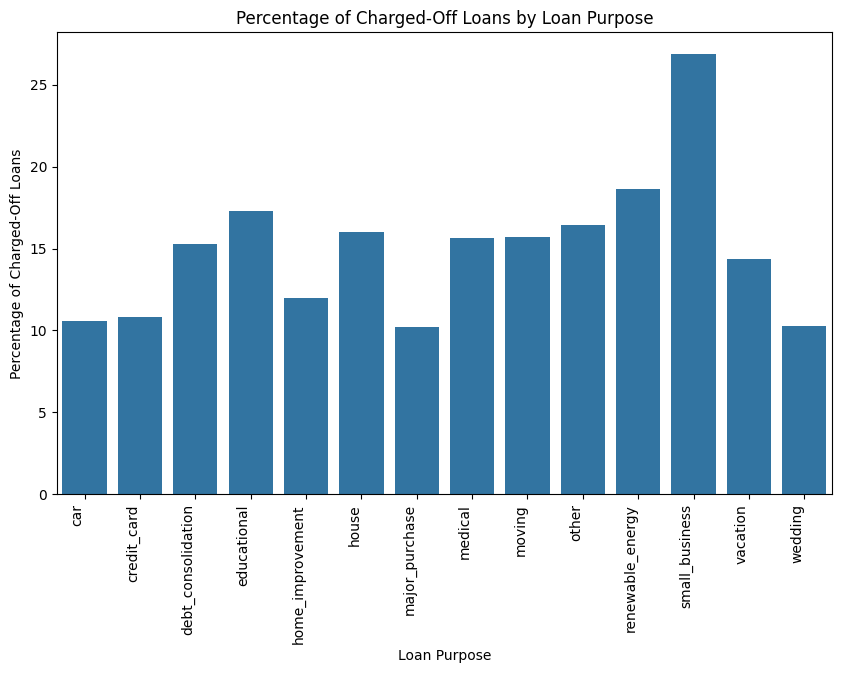

loan_status         Charged Off  Fully Paid  Total  Charged_Off_Percentage
purpose                                                                   
car                         157        1325   1482               10.593792
credit_card                 534        4394   4928               10.836039
debt_consolidation         2716       15047  17763               15.290210
educational                  53         254    307               17.263844
home_improvement            338        2487   2825               11.964602
house                        58         304    362               16.022099
major_purchase              218        1913   2131               10.229939
medical                     105         567    672               15.625000
moving                       89         478    567               15.696649
other                       619        3141   3760               16.462766
renewable_energy             19          83    102               18.627451
small_business           

In [81]:
# Charged Off loan Percentage Vs Purpose
status_counts = loan_df.groupby('purpose')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Loan Purpose')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

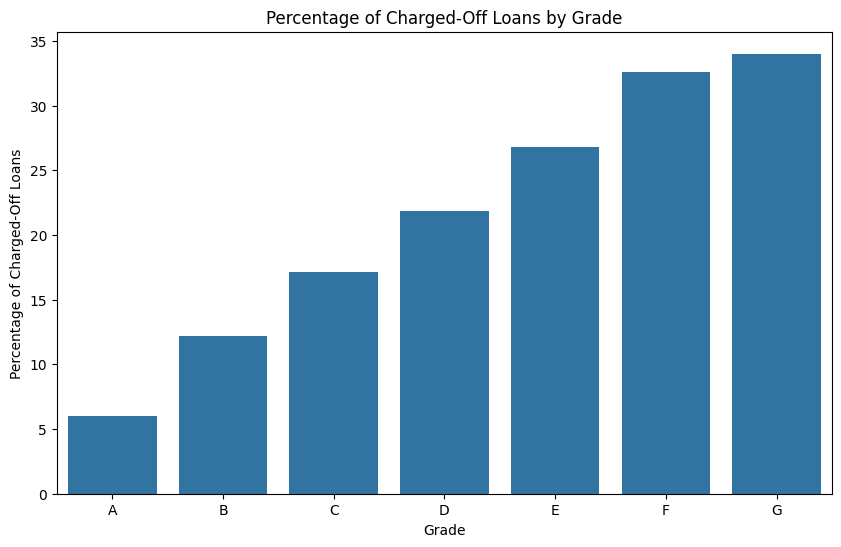

loan_status  Charged Off  Fully Paid  Total  Charged_Off_Percentage
grade                                                              
A                    596        9306   9902                6.018986
B                   1396       10069  11465               12.176188
C                   1313        6336   7649               17.165643
D                   1085        3889   4974               21.813430
E                    705        1923   2628               26.826484
F                    313         648    961               32.570239
G                    101         196    297               34.006734


In [82]:
#Charged Off loan Percentage Vs Grade
status_counts = loan_df.groupby('grade')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('Grade')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Grade')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

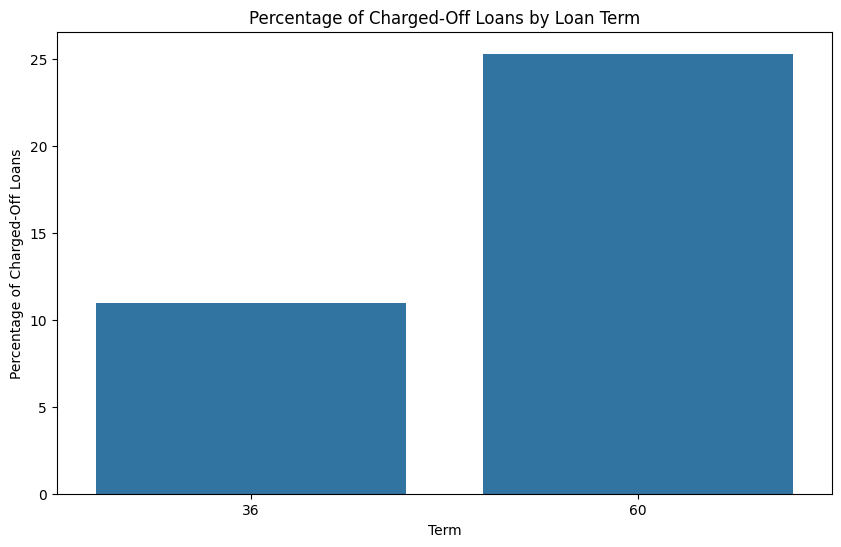

loan_status  Charged Off  Fully Paid  Total  Charged_Off_Percentage
term                                                               
36                  3109       25287  28396               10.948725
60                  2400        7080   9480               25.316456


In [84]:
# Charged Off loan Percentage Vs Term
status_counts = loan_df.groupby('term')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('Term')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Loan Term')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

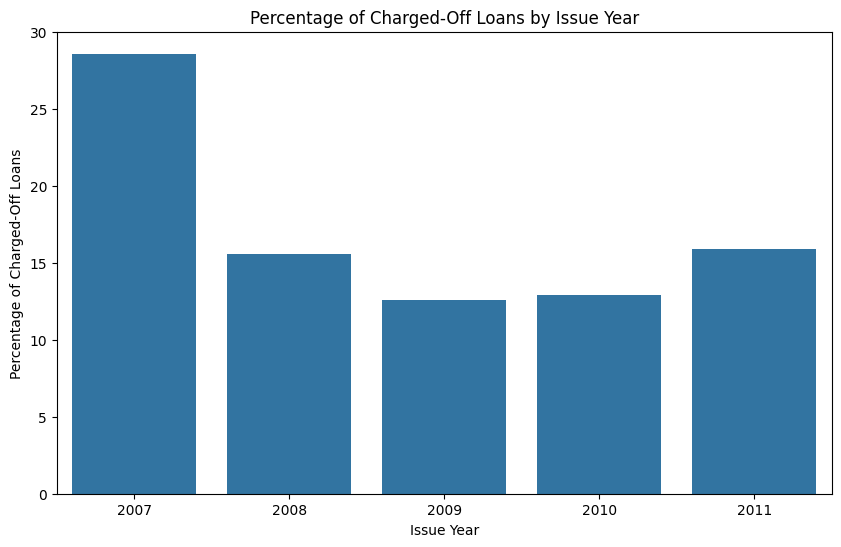

loan_status  Charged Off  Fully Paid  Total  Charged_Off_Percentage
issue_y                                                            
2007                   2           5      7               28.571429
2008                 173         939   1112               15.557554
2009                 593        4120   4713               12.582219
2010                1485       10044  11529               12.880562
2011                3256       17259  20515               15.871314


In [85]:
# Charged Off loan Percentage Vs Issue year
status_counts = loan_df.groupby('issue_y')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('Issue Year')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Issue Year')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

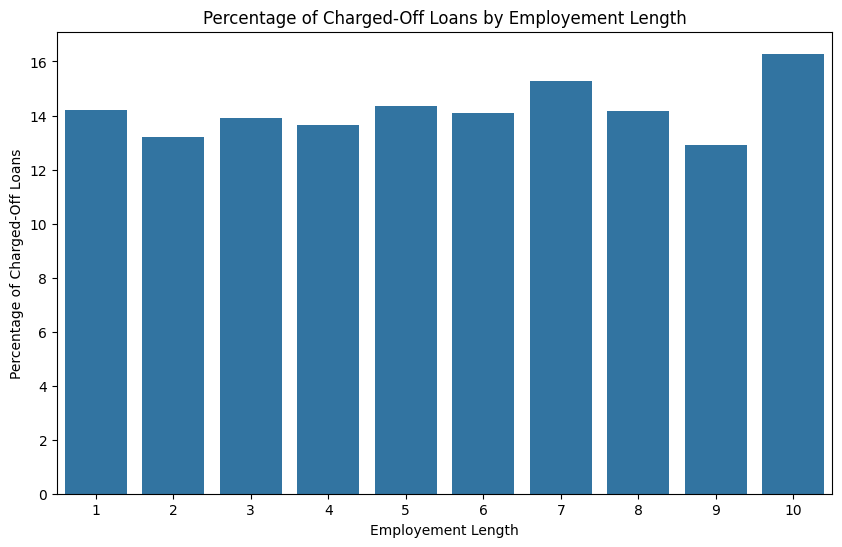

loan_status  Charged Off  Fully Paid  Total  Charged_Off_Percentage
emp_length                                                         
1                   1054        6364   7418               14.208682
2                    556        3651   4207               13.216068
3                    549        3401   3950               13.898734
4                    450        2847   3297               13.648772
5                    454        2706   3160               14.367089
6                    301        1835   2136               14.091760
7                    258        1431   1689               15.275311
8                    200        1210   1410               14.184397
9                    156        1053   1209               12.903226
10                  1531        7869   9400               16.287234


In [86]:
# Charged Off loan Percentage Vs Employement Length
status_counts = loan_df.groupby('emp_length')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('Employement Length')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Employement Length')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

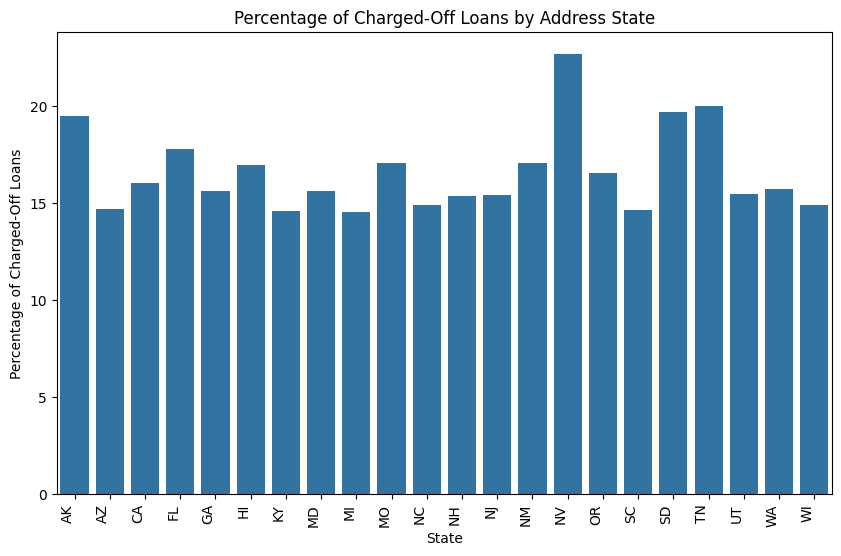

loan_status  Charged Off  Fully Paid  Total  Charged_Off_Percentage
addr_state                                                         
AK                    15          62     77               19.480519
AL                    54         374    428               12.616822
AR                    27         205    232               11.637931
AZ                   123         714    837               14.695341
CA                  1102        5763   6865               16.052440
CO                    94         649    743               12.651413
CT                    92         624    716               12.849162
DC                    14         194    208                6.730769
DE                    12          99    111               10.810811
FL                   485        2244   2729               17.772078
GA                   208        1126   1334               15.592204
HI                    28         137    165               16.969697
IA                     0           1      1     

In [88]:
#Percentage of loan charged off Vs address state
status_counts = loan_df.groupby('addr_state')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100
status_counts_filtered=status_counts[status_counts['Charged_Off_Percentage'] > 14]
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts_filtered.index, y='Charged_Off_Percentage', data=status_counts_filtered)
plt.xlabel('State')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Address State')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

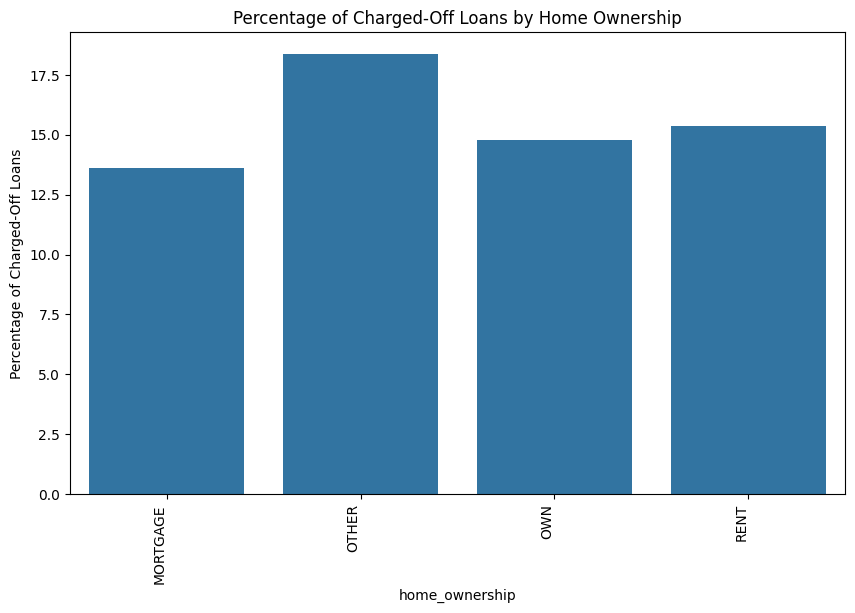

loan_status     Charged Off  Fully Paid  Total  Charged_Off_Percentage
home_ownership                                                        
MORTGAGE               2281       14485  16766               13.604915
OTHER                    18          80     98               18.367347
OWN                     430        2483   2913               14.761414
RENT                   2780       15319  18099               15.359965


In [89]:
#Percentage of charged off loans Vs home ownership
status_counts = loan_df.groupby('home_ownership')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('home_ownership')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Home Ownership')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

In [ ]:
#Count of Charged off loans Vs Subgrade
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))


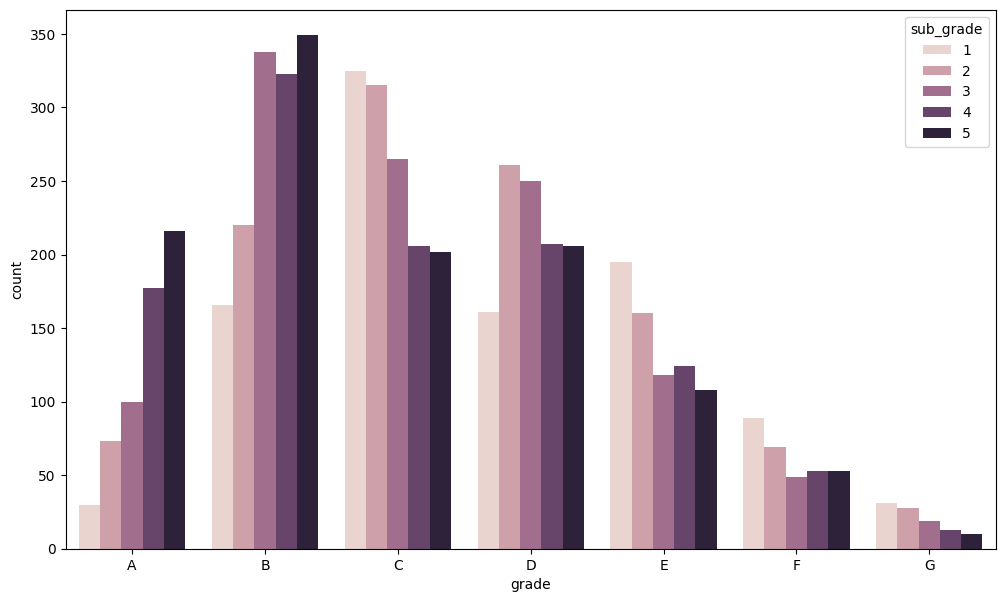

In [91]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

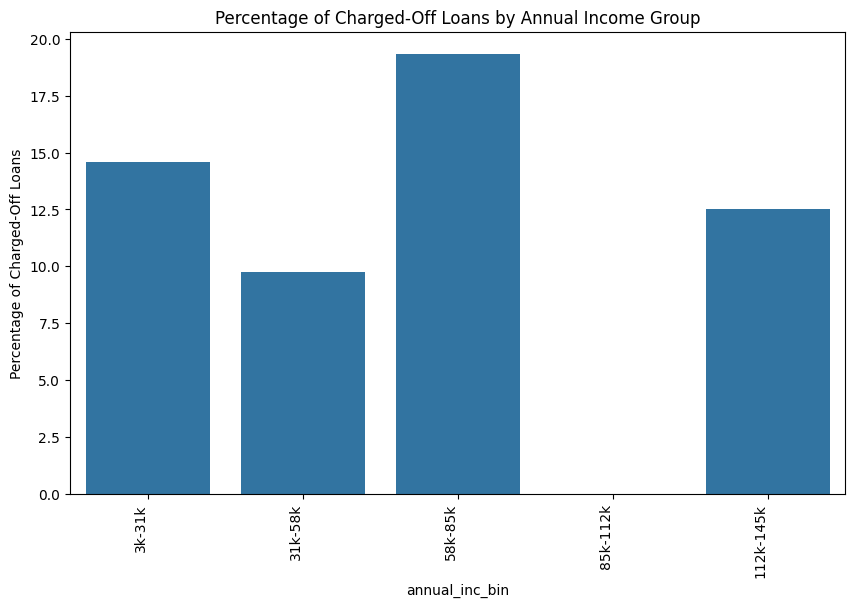

loan_status     Charged Off  Fully Paid  Total  Charged_Off_Percentage
annual_inc_bin                                                        
3k-31k                 5486       32180  37666               14.564860
31k-58k                  16         148    164                9.756098
58k-85k                   6          25     31               19.354839
85k-112k                  0           7      7                0.000000
112k-145k                 1           7      8               12.500000


In [92]:
#Percentage of charged off loans Vs annual_inc_bin
status_counts = loan_df.groupby('annual_inc_bin')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('annual_inc_bin')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Annual Income Group')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

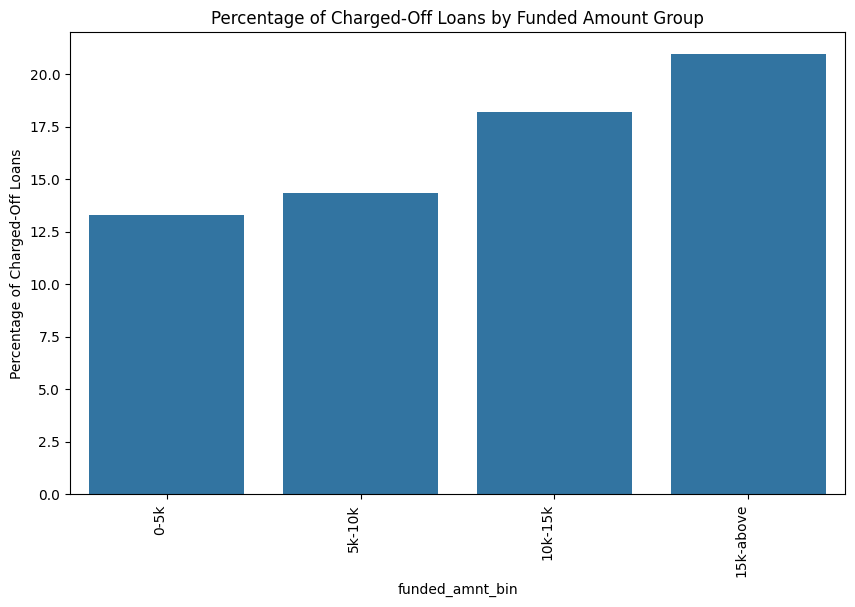

loan_status      Charged Off  Fully Paid  Total  Charged_Off_Percentage
funded_amnt_bin                                                        
0-5k                    2470       16097  18567               13.303172
5k-10k                  1879       11239  13118               14.323830
10k-15k                  913        4099   5012               18.216281
15k-above                247         932   1179               20.949958


In [93]:
#Percentage of charged off loans Vs funded_amnt_bin
status_counts = loan_df.groupby('funded_amnt_bin')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('funded_amnt_bin')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Funded Amount Group')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

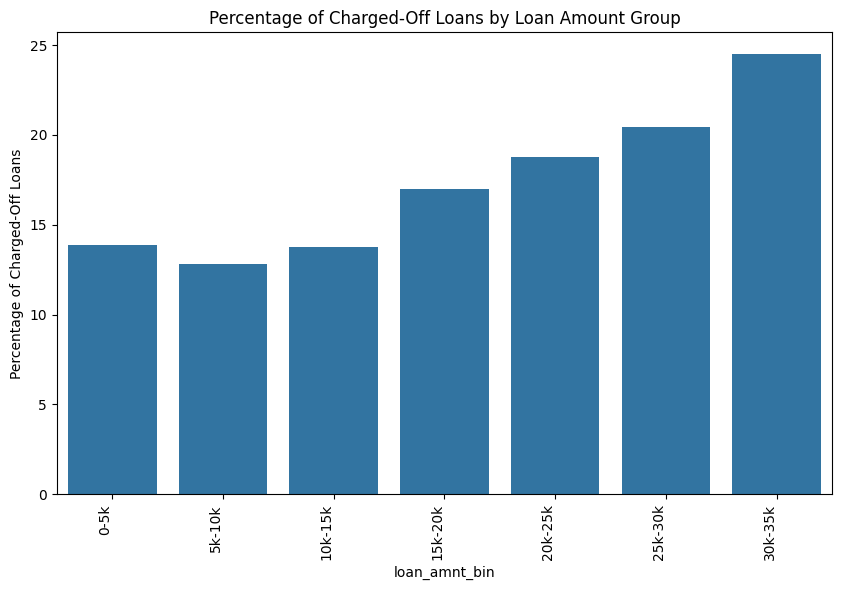

loan_status    Charged Off  Fully Paid  Total  Charged_Off_Percentage
loan_amnt_bin                                                        
0-5k                  1328        8232   9560               13.891213
5k-10k                1585       10771  12356               12.827776
10k-15k               1042        6525   7567               13.770318
15k-20k                712        3478   4190               16.992840
20k-25k                519        2249   2768               18.750000
25k-30k                143         557    700               20.428571
30k-35k                180         555    735               24.489796


In [94]:
#Percentage of charged off loans Vs Loan_amnt_bin
status_counts = loan_df.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('loan_amnt_bin')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Loan Amount Group')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

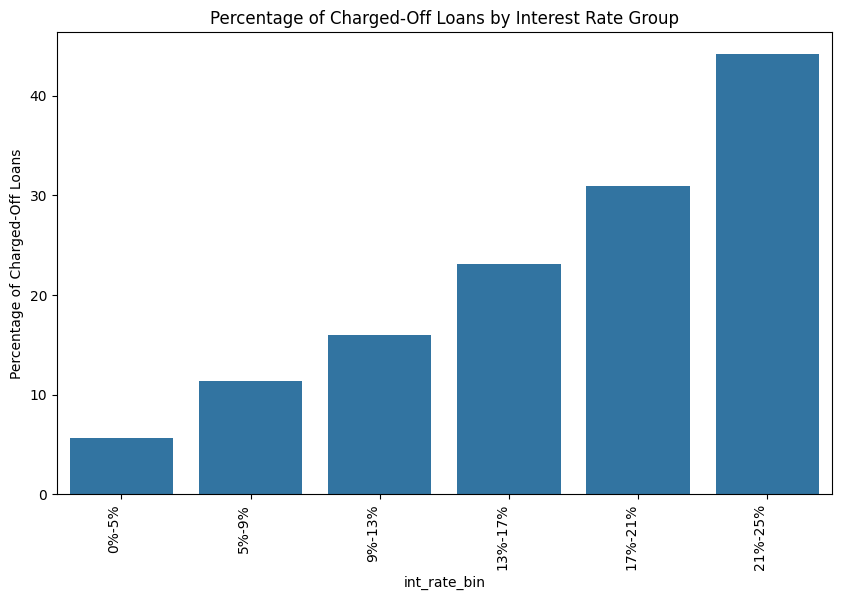

loan_status   Charged Off  Fully Paid  Total  Charged_Off_Percentage
int_rate_bin                                                        
0%-5%                 488        8119   8607                5.669804
5%-9%                1158        9053  10211               11.340711
9%-13%               1710        8982  10692               15.993266
13%-17%              1418        4715   6133               23.120822
17%-21%               591        1316   1907               30.991085
21%-25%               144         182    326               44.171779


In [95]:
#Percentage of charged off loans Vs int_rate_bin
status_counts = loan_df.groupby('int_rate_bin')['loan_status'].value_counts().unstack()
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Charged_Off_Percentage'] = (status_counts['Charged Off'] / status_counts['Total']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y='Charged_Off_Percentage', data=status_counts)
plt.xlabel('int_rate_bin')
plt.ylabel('Percentage of Charged-Off Loans')
plt.title('Percentage of Charged-Off Loans by Interest Rate Group')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()
# Print the results
print(status_counts)

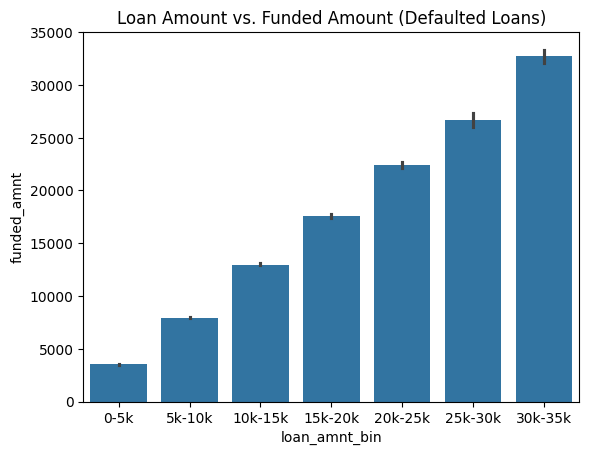

In [102]:
# Filter for defaulted loans for Bivariate Analysis
defaulted_loans = loan_df[loan_df['loan_status'] == 'Charged Off']

sns.barplot(x='loan_amnt_bin', y='funded_amnt', data=defaulted_loans)
plt.title("Loan Amount vs. Funded Amount (Defaulted Loans)")
plt.show()

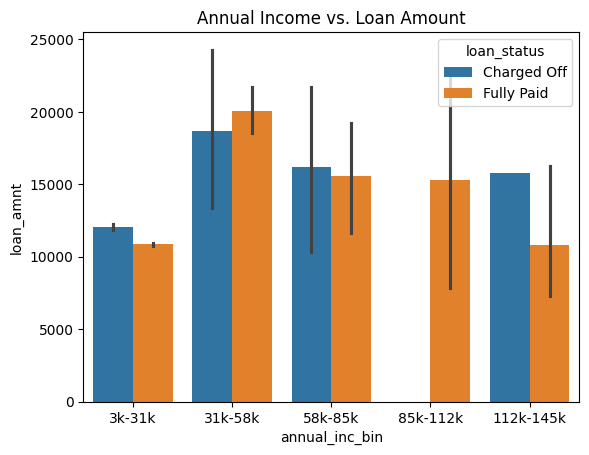

In [119]:
sns.barplot(x='annual_inc_bin', y='loan_amnt',hue = 'loan_status',data = loan_df)
plt.title("Annual Income vs. Loan Amount")
plt.show()

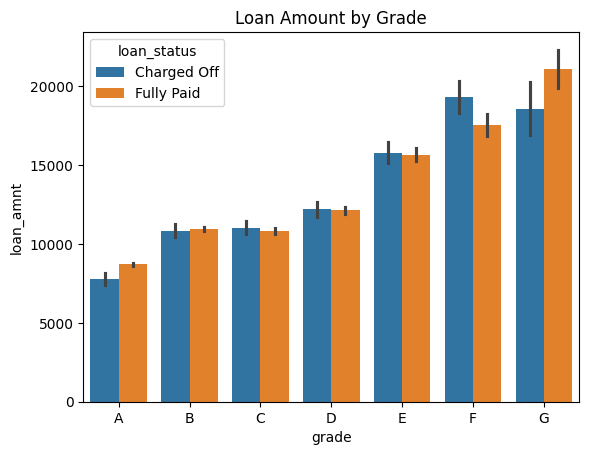

In [120]:
sns.barplot(x='grade', y='loan_amnt', hue = 'loan_status',data = loan_df)
plt.title("Loan Amount by Grade")
plt.show()

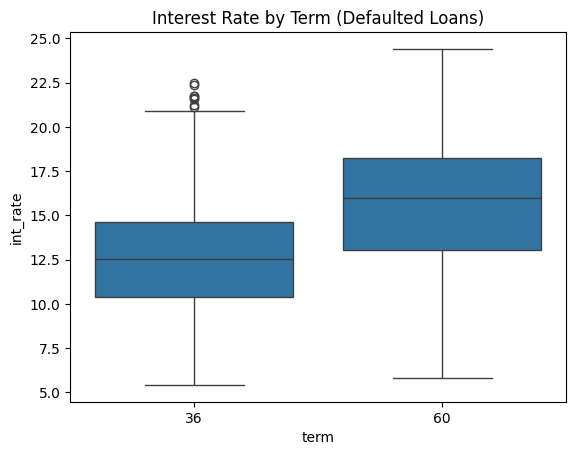

In [72]:
sns.boxplot(x='term', y='int_rate', data=defaulted_loans)
plt.title("Interest Rate by Term (Defaulted Loans)")
plt.show()

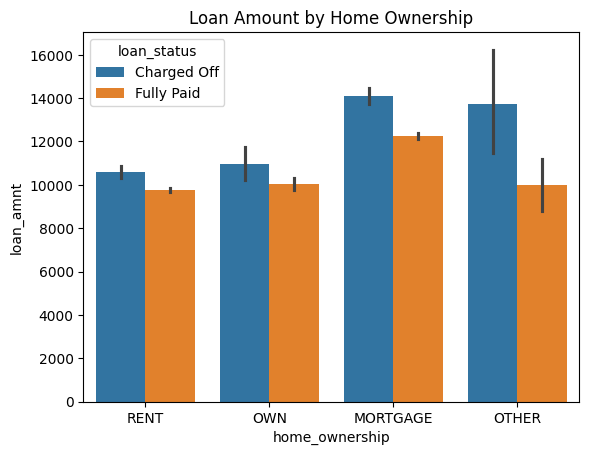

In [118]:
sns.barplot(x='home_ownership', y='loan_amnt', hue = 'loan_status',data = loan_df)
plt.title("Loan Amount by Home Ownership")
plt.show()

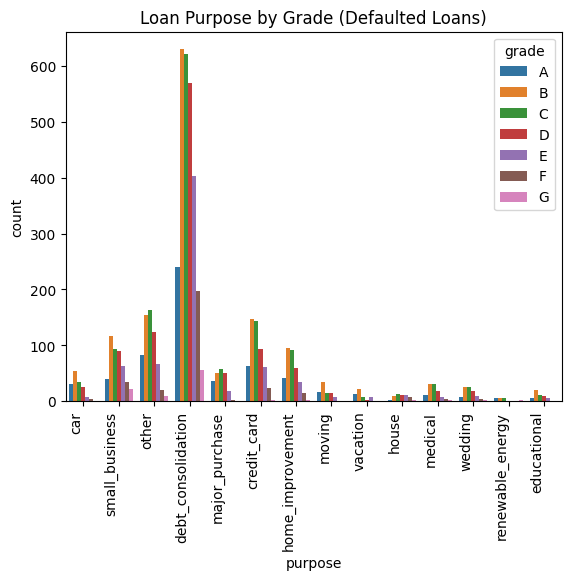

In [77]:
sns.countplot(x='purpose', hue='grade', data=defaulted_loans)
plt.title("Loan Purpose by Grade (Defaulted Loans)")
plt.xticks(rotation=90, ha='right')
plt.show()

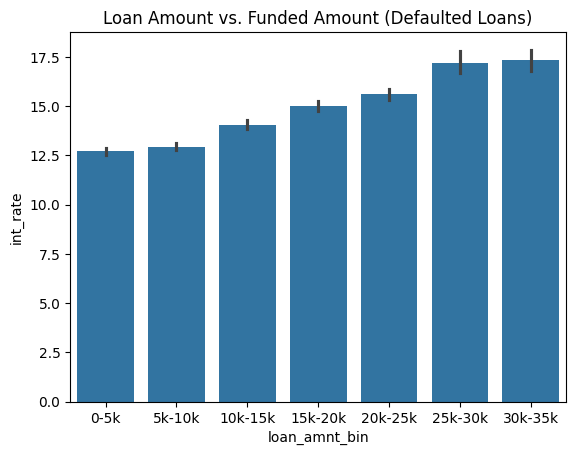

In [112]:
sns.barplot(x='loan_amnt_bin', y='int_rate', data=defaulted_loans)
plt.title("Loan Amount vs. Interest Rate (Defaulted Loans)")
plt.show()

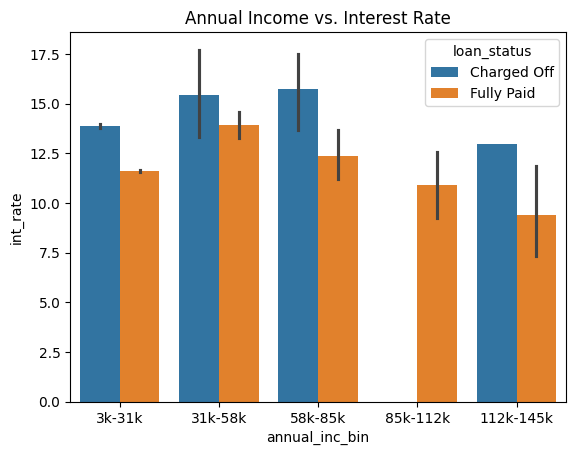

In [117]:
sns.barplot(x='annual_inc_bin', y='int_rate', hue = 'loan_status',data = loan_df)
plt.title("Annual Income vs. Interest Rate")
plt.show()

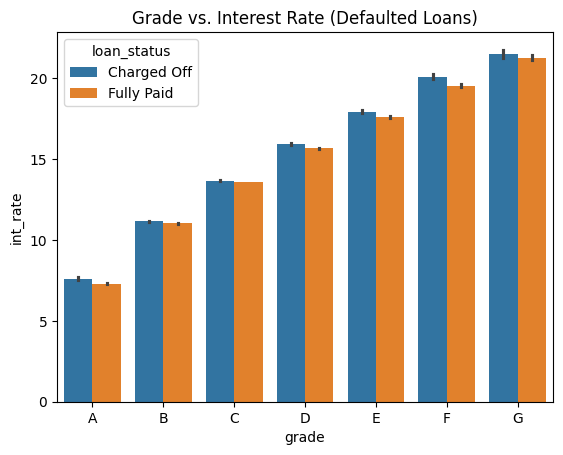

In [116]:
sns.barplot(x='grade', y='int_rate', hue = 'loan_status',data = loan_df)
plt.title("Grade vs. Interest Rate (Defaulted Loans)")
plt.show()

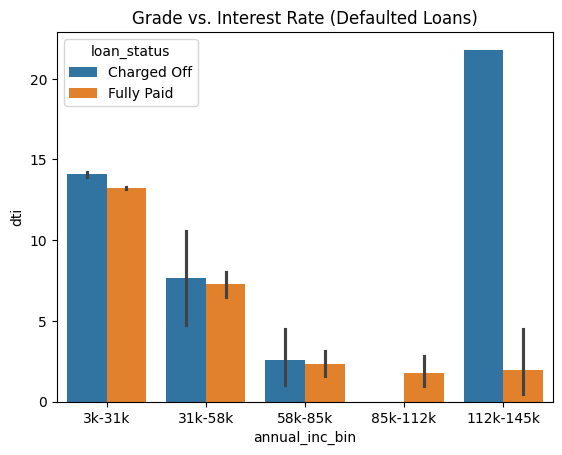

In [121]:
sns.barplot(x='annual_inc_bin', y='dti', hue = 'loan_status',data = loan_df)
plt.title("Annual Income vs. DTI")
plt.show()

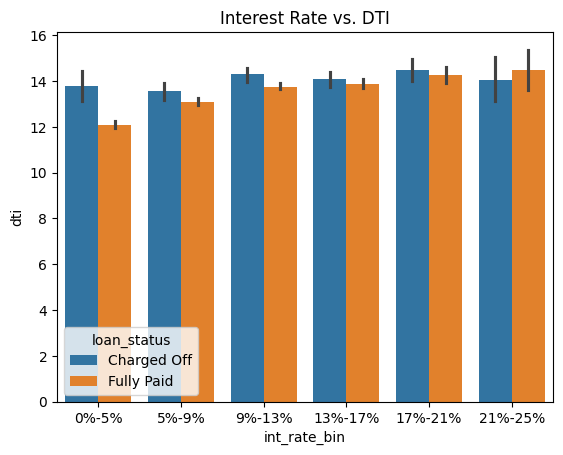

In [124]:
sns.barplot(x='int_rate_bin', y='dti', hue = 'loan_status',data = loan_df)
plt.title("Interest Rate vs. DTI")
plt.show()

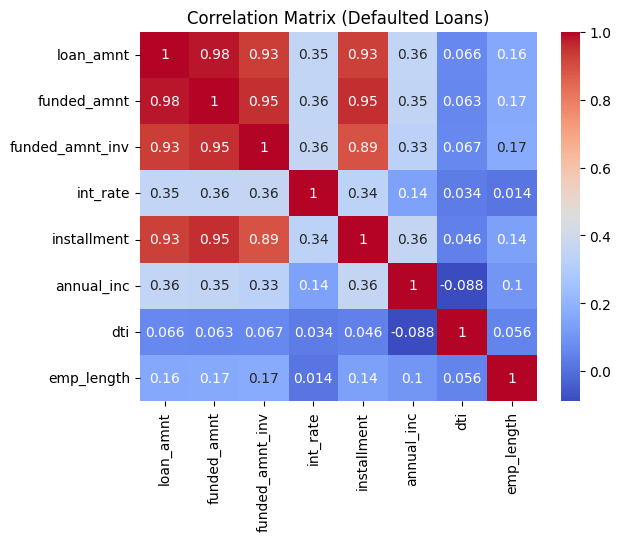

In [100]:
#finding correlation matrix
numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti','emp_length']
correlation_matrix = defaulted_loans[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Defaulted Loans)")
plt.show()

In [ ]:
#Loan_amount,funded_amt_inv,fundend_amt are corelated. dti and annual_inc negatively coreleated.